# Lab3: Linear Regression and Gradient Descent

*Note: This lab session is graded. Complete all the exercises and submit the ipynb to canvas under assignment Lab3*

*Also Note*: Slides for week3 "Jan_25_Supervised_regression_gradient_descent.pdf" have been updated. Please download the latest version and keep it for future reference.  

*Also Note:* Assignment 2 : Linear Regression will be posted tonight. **Deadline is Friday (02/03), 11:59 PM**

## 1. Regression
- Form of Supervised Learning 
- Input: feature vector of dimension N, $ X = \{x_1,x_2,x_3..,x_N\}~or~X \in \mathbb{R}^N $
- Output: Output: real valued label $ y \in \mathbb{R} $
- Training Objective: Find the best funciton f() that explains the data with minimum error
$ y = f(x_1,x_2,x_3..,x_N)$

### 1.1. Linear Regression:
- $f()$ is from a family of linear funcitons
- which means $ y = f(x_1,x_2,x_3..,x_N)$ => $y = w_1x_1+w_2x_2+w_3x_3+...+w_Nx_N+\beta$  
- $W=[w_1,w_2,w_3,...,w_N]$ are called parameters or weights
- Training objective:
    - Find the best set of parameters that minimize the **Error** on trainig data

### 1.2. Error Function for Linear Regression:

- Difference between predicted values and actual value from the dataset
- We take square of difference to make the error non-negative and the error function differentiable
- Squared error averaged over all training examples, so termed as Mean Squared Error (MSE)
- If training data has $M$ examples, MSE would be $$ Err = \frac{1}{M}\sum_{i=1}^{M} (y^{i}_{actual}-y^{i}_{predicted})^2$$
- Find Ws that minimize the above error on training data

## 2. Gradient Descent
#### 2.0. Why?
- We can not keep guess weights (Ws) randomly and expect to find the best Ws
- Gradient Descent offers an iterative mechanism to start and keep guessing Ws until we find no better Ws

#### 2.1. Gradient Descent Algorithm 
1. Initialize $W = [w_1,w_2,...,w_N]$ and $\beta$ with random values
2. For each example in the training data, compute $$y_{predicted} = w_1x_1+w_2x_2+w_3x_3+...+w_Nx_N+\beta$$

3. Now compute MSE ($Err$) on all training examples
4. Compute the gradient of $Err$, i.e., $\nabla(Err)$ with respect to W
5. Now update the weights:
$$ W_{new} = W_{old}-\eta\nabla{Err}$$
where, 
$\eta$ -> learning rate
6. Repeat steps 2-5 until convergence (i.e., $W_{new}$ and $W_{old}$ are same) 

#### 2.2. Gradient Descent Algorithm (simplified after gradient computation)
1. Initialize $W = [w_1,w_2,...,w_N]$ and $\beta$ with random values
2. For each example $i$ in the training data, compute $$y^{i}_{predicted} = w_1x^i_1+w_2x^i_2+w_3x^i_3+...+w_Nx^i_N+\beta$$
3. Update the weights
$$ w^{new}_{1} = w^{old}_{1} - \eta\sum_{i=1}^{M} (y^{i}_{predicted}-y^{i}_{actual})x^i_1$$
$$ w^{new}_{2} = w^{old}_{1} - \eta\sum_{i=1}^{M} (y^{i}_{predicted}-y^{i}_{actual})x^i_2$$
$$ ...$$
$$ w^{new}_{N} = w^{old}_{N} - \eta\sum_{i=1}^{M} (y^{i}_{predicted}-y^{i}_{actual})x^i_N$$



    



## 3. Linear Regression using Scikit Learn

- Let's reconsider the same IMDB Movie Dataset, the same data we used for feature engineering
- Let's define a task:
    - Predict "gross" revenue the movie will generate from the following features:
        - actor1_name)
        - budget
        - imdb_score
        - movie_facebook_likes
        - num_user_for_reviews
    - So, our label column is:
        - gross
- **Steps:**
    - Feature Engineering: We will REUSE the feature engineering steps from the previous class
    - Data Splitting: We will split our dataset into training and test splits
    - Training a Linear Regression: We will train our linear regression model 
    - Evaluation: We will observe the performance of our model using:
        - Mean Squared Error
        - Mean Absolute Error 
        - Correlation between predicted and actual values of gross
    - We will rank features based on the weights to see how significant they are


### 3.1 Data Loading and Exploratory Analysis

In [1]:
import pandas as pd # See how we are using aliases for library names
from sklearn.preprocessing import OneHotEncoder

imdb_dataframe = pd.read_csv("Lab2_IMDB_movie_metadata.csv")
imdb_dataframe = imdb_dataframe.drop_duplicates()

# Let's gather all columns of interest (including gross) 
imdb_features_and_labels_df = imdb_dataframe[["actor_1_name","budget","imdb_score","movie_facebook_likes", "num_user_for_reviews","gross"]]

# We will now apply dropna()
imdb_features_and_labels_df = imdb_features_and_labels_df.dropna()
imdb_features_and_labels_df.head()


,actor_1_name,budget,imdb_score,movie_facebook_likes,num_user_for_reviews,gross
0,CCH Pounder,237000000.0,7.9,33000,3054.0,760505847.0
1,Johnny Depp,300000000.0,7.1,0,1238.0,309404152.0
2,Christoph Waltz,245000000.0,6.8,85000,994.0,200074175.0
3,Tom Hardy,250000000.0,8.5,164000,2701.0,448130642.0
5,Daryl Sabara,263700000.0,6.6,24000,738.0,73058679.0


### 3.2. Feature Engineering

In [2]:
# Let's construct features and labels df separately

imdb_features_df = imdb_features_and_labels_df[["actor_1_name","budget","imdb_score","movie_facebook_likes", "num_user_for_reviews"]]
imdb_labels_df = imdb_features_and_labels_df[["gross"]]

# Transform categorical features into 1-hot
actors_names_to_list = imdb_features_df["actor_1_name"].to_list()
actors_names_to_list_of_lists = []

for name in actors_names_to_list:
    actors_names_to_list_of_lists.append([name])
    
actor_encoder = OneHotEncoder()
actor_encoder.fit(actors_names_to_list_of_lists)

print(f"Unique vocabulary items {len(actor_encoder.categories_[0])}\n")

actors_names_transformed = actor_encoder.transform(actors_names_to_list_of_lists)
actors_names_transformed = actors_names_transformed.toarray()
actors_names_transformed_df = pd.DataFrame(actors_names_transformed)

imdb_features_df.reset_index(drop=True, inplace=True)
actors_names_transformed_df.reset_index(drop=True, inplace=True)

imdb_features_transformed_df = pd.concat([imdb_features_df,actors_names_transformed_df], axis=1)
imdb_features_transformed_df = imdb_features_transformed_df.drop(columns=["actor_1_name"], axis=1)
imdb_features_transformed_df.head()

Unique vocabulary items 1509



,budget,imdb_score,movie_facebook_likes,num_user_for_reviews,0,1,2,3,4,5,...,1499,1500,1501,1502,1503,1504,1505,1506,1507,1508
0,237000000.0,7.9,33000,3054.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,300000000.0,7.1,0,1238.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,245000000.0,6.8,85000,994.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,250000000.0,8.5,164000,2701.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,263700000.0,6.6,24000,738.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3.3 Splitting Data into train, validation and test splits
- We will split the data into 90% train, 10% validation, 10% test

In [3]:
from sklearn.model_selection import train_test_split

features = imdb_features_transformed_df.to_numpy()
labels = imdb_labels_df.to_numpy()

print (f"Features' shape [no. of examples * feature vector size] =  {features.shape}")
print (f"Label's shape [no. of examples * 1] = {labels.shape}")

Features' shape [no. of examples * feature vector size] =  (3854, 1513)
Label's shape [no. of examples * 1] = (3854, 1)


In [4]:
# First derive the test data
x_, x_test, y_, y_test = train_test_split(features, labels, test_size=0.10, random_state=42)

# Then create the validation data
x_train, x_valid, y_train, y_valid = train_test_split(x_, y_, test_size=0.10, random_state=42)

print (f"Training: Features' shape [no. of examples * feature vector size] =  {x_train.shape}")
print (f"Training: Label's shape [no. of examples * 1] = {y_train.shape}")

print (f"Validation: Features' shape [no. of examples * feature vector size] =  {x_valid.shape}")
print (f"Validation: Label's shape [no. of examples * 1] = {y_valid.shape}")

print (f"Test: Features' shape [no. of examples * feature vector size] =  {x_test.shape}")
print (f"Test: Label's shape [no. of examples * 1] = {y_test.shape}")


Training: Features' shape [no. of examples * feature vector size] =  (3121, 1513)
Training: Label's shape [no. of examples * 1] = (3121, 1)
Validation: Features' shape [no. of examples * feature vector size] =  (347, 1513)
Validation: Label's shape [no. of examples * 1] = (347, 1)
Test: Features' shape [no. of examples * feature vector size] =  (386, 1513)
Test: Label's shape [no. of examples * 1] = (386, 1)


### 3.4. Train Linear Regression using Training Data

In [5]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

regression = LinearRegression(copy_X=True)
y_train = y_train.flatten()

# training 
regression = regression.fit(x_train, y_train)

print ("Training complete")

Training complete


### 3.5. Evaluation on test data

In [6]:
import sklearn.metrics as metrics
from scipy.stats import pearsonr

# perform prediction on test data
y_test = y_test.flatten()
y_test_predicted = regression.predict(x_test)

mean_squared_error=metrics.mean_squared_error(y_test, y_test_predicted)
mean_absolute_error=metrics.mean_absolute_error(y_test, y_test_predicted)
correlation = pearsonr(y_test, y_test_predicted)

print (f"Mean Squared Error on training data {mean_squared_error}")
print (f"Mean Absolute Error on training data {mean_absolute_error}")
print (f"Pearson correlation coefficient between training and test data is {correlation.statistic}")


Mean Squared Error on training data 6172253265343630.0
Mean Absolute Error on training data 39707521.683767356
Pearson correlation coefficient between training and test data is 0.47289695930875425


### 3.6. How to interpret the result:
- A mean absolute error of 39707521 means the predicted value for gross can on an average deviate from the actual value by 39707521 (+- 39 Million USD). So our model is perhaps not learning well. 

- We may need to do more data analysis, select better features and get rid of too many unnecessary features (this is bread and butter for an ML engineer)

- This is where feature selection techniques (such as PCA and t-SNE) may be helpful

- Correlation between predicted and actual values for gross is 0.47 which is decently strong. This means of we have to rank movies based on how well they will do, our model's predictions can be useful for ranking

### 3.7. Analyze feature importants by plotting weights learned

- Let's assume weights learned for each feature -> importance of that feature
- Let's plot the weights


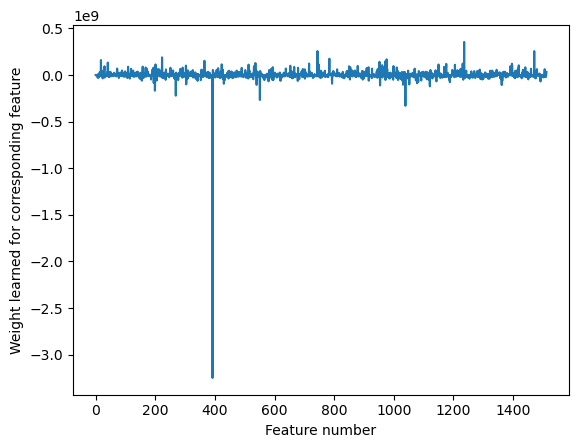

In [7]:
from matplotlib import pyplot as plt

weights = regression.coef_
plt.plot(range(len(weights)), weights)
plt.xlabel("Feature number")
plt.ylabel("Weight learned for corresponding feature")
plt.show()


## E1. Exercise: Remove actor1_name and repeat training 
- Let's remove **actor1_name** from our feature list and repeat 3.1-3.7
- The set of features we are considering now are:
    - budget
    - imdb_score
    - movie_facebook_likes
    - num_user_for_reviews
- Note: there are no categorical variables now
- Question: Are we getting better evaluation scores?
- Quesiton: Is plotting the learned weights giving any insights as to which features are important?
- Question: How much extra time did you need beyond the lab session to complete this exercise?


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6f501a8e-f6e4-43a9-b4a2-6516b2e3d333' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>